# **House Price Prediction Project**

## **Loading Data Set**

In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
data = pd.read_csv('https://raw.githubusercontent.com/bauti-pons/data/main/california_housing_prices.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## **Data Exploration**

In [3]:
# Check if the data set has missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Remove missing values from the data set inplace
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

# Get the independent variables by removing the dependent variable column from the dataset
x = data.drop(["median_house_value"], axis = 1)
# Get the dependent variables
y = data["median_house_value"]

In [6]:
# Split the data set into training and testing sets, with 80% of the data used for training and 20% used for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# Create a new DataFrame by joining x_train and y_train
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11183,-117.94,33.82,27.0,1366.0,326.0,878.0,325.0,3.4000,<1H OCEAN,196900.0
14796,-117.10,32.58,27.0,2616.0,591.0,1889.0,577.0,2.3824,NEAR OCEAN,127600.0
5081,-118.30,33.98,48.0,1998.0,410.0,1176.0,382.0,3.0455,<1H OCEAN,102400.0
16869,-122.41,37.61,42.0,1602.0,262.0,705.0,255.0,5.7398,NEAR OCEAN,336400.0
11871,-117.35,34.00,38.0,1214.0,254.0,723.0,236.0,2.5469,INLAND,87800.0
...,...,...,...,...,...,...,...,...,...,...
18794,-122.76,40.40,22.0,2153.0,461.0,903.0,314.0,2.1250,INLAND,123200.0
19348,-122.85,38.62,16.0,4418.0,704.0,1908.0,697.0,4.5913,<1H OCEAN,244600.0
18462,-121.77,37.24,12.0,10236.0,1878.0,5674.0,1816.0,4.7470,<1H OCEAN,261100.0
10496,-117.66,33.50,16.0,1956.0,346.0,862.0,326.0,4.4732,<1H OCEAN,186300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

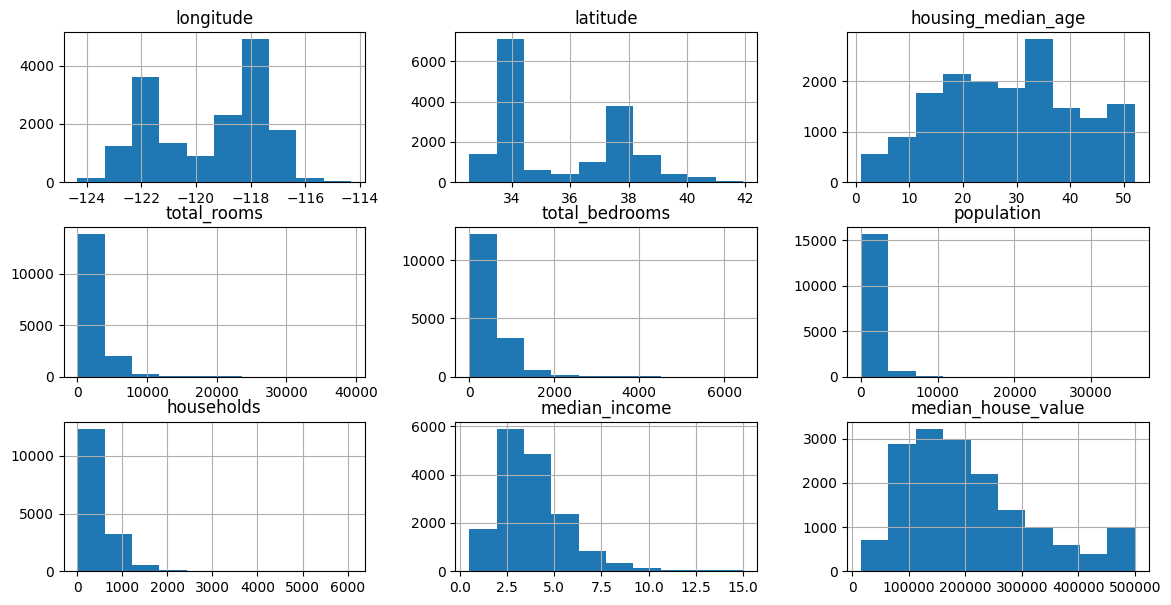

In [8]:
# Generate and display a separate histogram for each numeric column in train_data. Each one shows the distribution of values in its respective column
train_data.hist(figsize=(14, 7))

<ipython-input-9-ddb18a87742f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")


<Axes: >

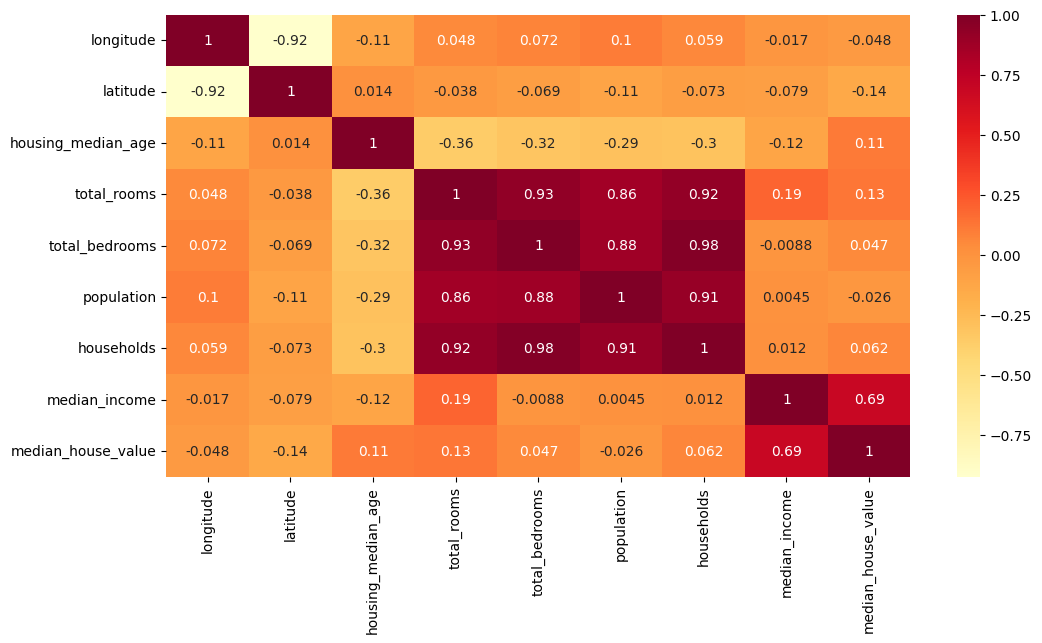

In [9]:
# Generate a visual representation of how strongly the features in train_data are correlated with each other.
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

## **Data Preprocessing**

In [10]:
# Apply a logarithmic transformation to several columns of the train_data datafame to reduce skewness
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

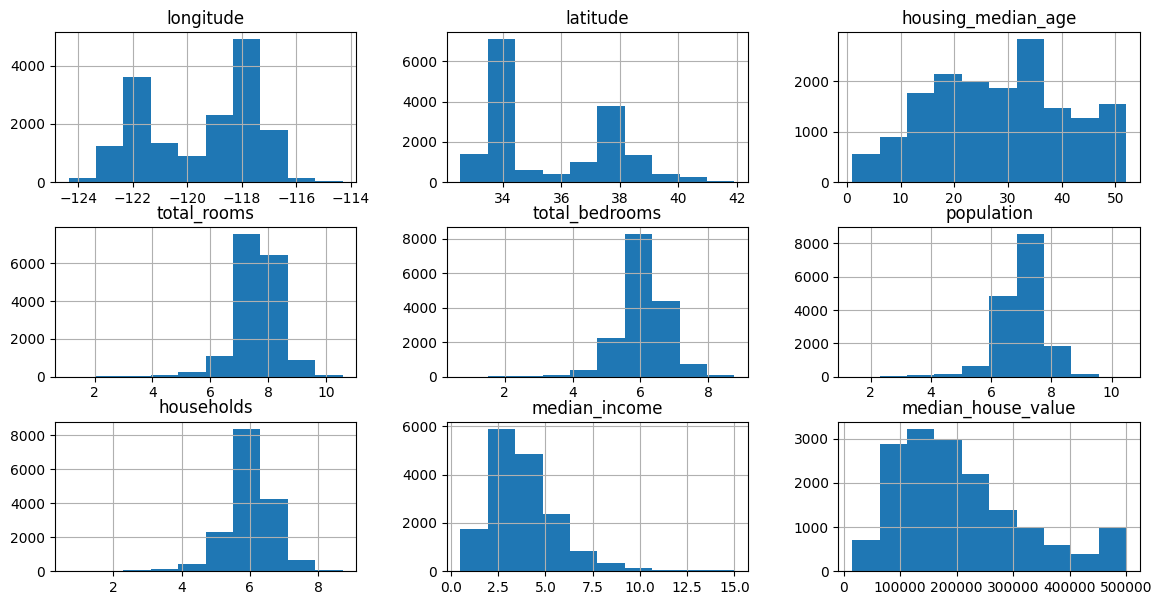

In [11]:
train_data.hist(figsize=(14,7))

In [12]:
# Count the number of occurrences of each unique value in the ocean_proximity column of the train_data dataframe
train_data.ocean_proximity.value_counts()

<1H OCEAN     7170
INLAND        5233
NEAR OCEAN    2127
NEAR BAY      1812
ISLAND           4
Name: ocean_proximity, dtype: int64

In [13]:
# Convert the categorical variable ocean_proximity into a dataframe of binary variables (0 = no, 1 = yes)
# Add the new one-hot encoded columns to the original train_data dataframe, while keeping all the original columns
# Drop the original ocean proximity column from the resulting dataframe
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11183,-117.94,33.82,27.0,7.220374,5.789960,6.778785,5.786897,3.4000,196900.0,1,0,0,0,0
14796,-117.10,32.58,27.0,7.869784,6.383507,7.544332,6.359574,2.3824,127600.0,0,0,0,0,1
5081,-118.30,33.98,48.0,7.600402,6.018593,7.070724,5.948035,3.0455,102400.0,1,0,0,0,0
16869,-122.41,37.61,42.0,7.379632,5.572154,6.559615,5.545177,5.7398,336400.0,0,0,0,0,1
11871,-117.35,34.00,38.0,7.102499,5.541264,6.584791,5.468060,2.5469,87800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,-122.76,40.40,22.0,7.675082,6.135565,6.806829,5.752573,2.1250,123200.0,0,1,0,0,0
19348,-122.85,38.62,16.0,8.393669,6.558198,7.554335,6.548219,4.5913,244600.0,1,0,0,0,0
18462,-121.77,37.24,12.0,9.233764,7.538495,8.643826,7.504942,4.7470,261100.0,1,0,0,0,0
10496,-117.66,33.50,16.0,7.579168,5.849325,6.760415,5.789960,4.4732,186300.0,1,0,0,0,0


<Axes: >

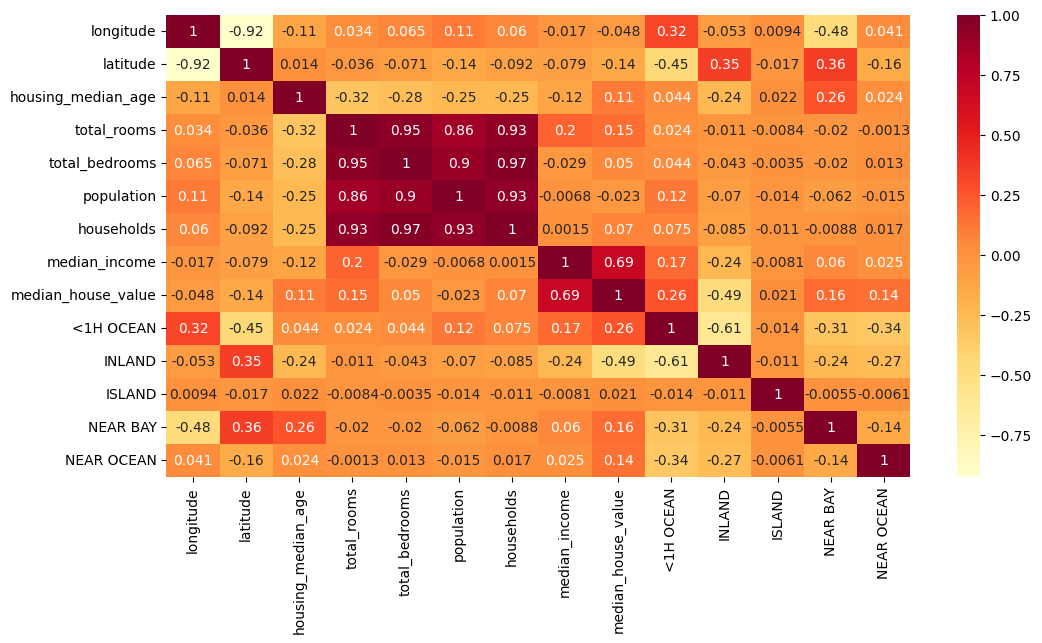

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

<Axes: xlabel='latitude', ylabel='longitude'>

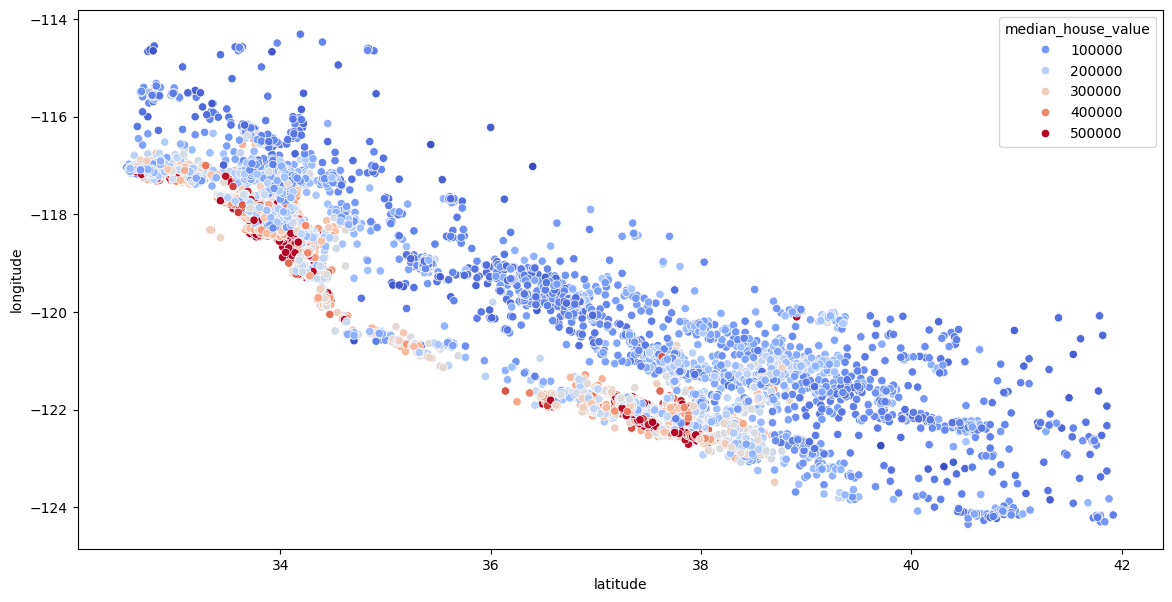

In [16]:
# Create a scatter plot that visualizes geographical data points (with latitude and longitude as coordinates) from the train_data dataframe
plt.figure(figsize=(14,7))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

## **Feature Engineering**

In [17]:
# Add two new features to the train_data dataframe, calculated from existing columns
# The purpose is to reveal patterns or relationships that were not previously evident, improving the performance of the predictive model
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

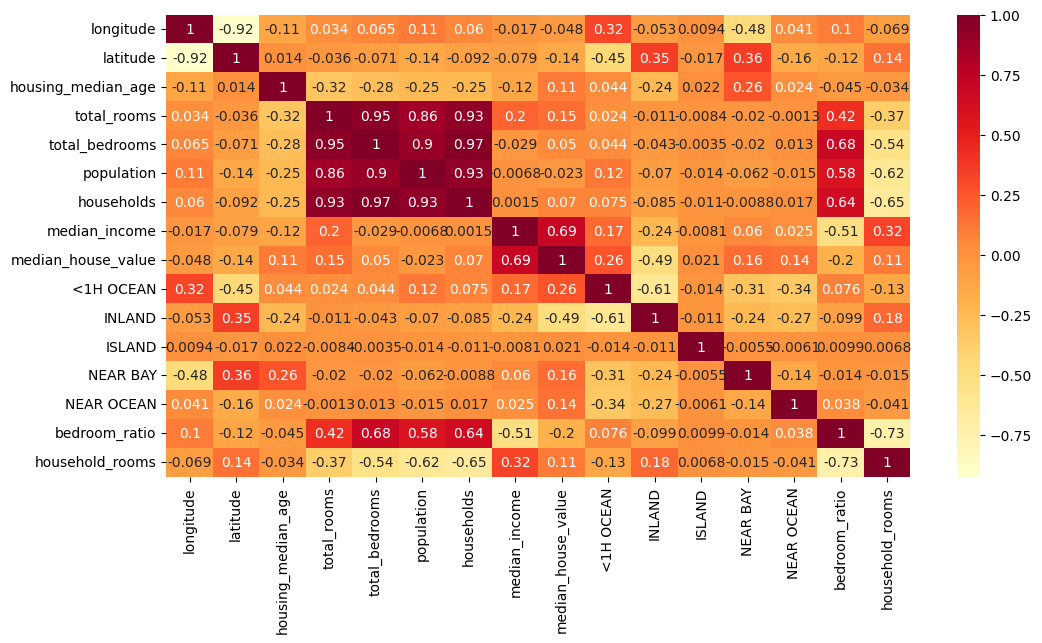

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

## **Linear Regression Model**

In [19]:
# Create and training a linear regression model using the scikit-learn library, specifically its LinearRegression class
# Apply feature scaling to your training data (x_train) using the StandardScaler class from the scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [20]:
# Ensure that the test data undergoes the same transformations as the training data before it can be used for model evaluation
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [21]:
# Split the preprocessed test_data dataframe back into features (x_test) and the target variable (y_test) after all the preprocessing steps have been applied
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [24]:
# Transform the test dataset (x_test) using the previously fitted scaler instance
x_test_s = scaler.transform(x_test)

In [25]:
# Evaluate the performance of the trained linear regression model reg on the test dataset
reg.score(x_test, y_test)

0.6714301251307939

## **Random Forest Model**

In [26]:
# Create and train a RandomForestRegressor model using the scikit-learn library
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [27]:
# Evaluate the performance of your trained RandomForestRegressor model (forest) on the test dataset
forest.score(x_test_s, y_test)

0.8049459817023332

In [28]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create an instance of the RandomForestRegressor
forest = RandomForestRegressor()

# Define the parameter grid to search through for the RandomForestRegressor
param_grid = {
    "n_estimators" : [100, 200, 300], # The number of trees in the forest
    "min_samples_split" : [2, 4],     # The minimum number of samples required to split an internal node
    "max_depth" : [None, 4, 8]        # The maximum depth of the trees. 'None' means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
}

# Initialize GridSearchCV with the RandomForestRegressor instance (forest), the parameter grid, and configuration for cross-validation
grid_search = GridSearchCV(forest, param_grid, cv=5,          # cv=5 specifies 5-fold cross-validation
                           scoring="neg_mean_squared_error",  # Use negative mean squared error as the evaluation metric
                           return_train_score=True)           # Return training scores for analyzing overfitting

# Fit the grid search to the training data. This process will find the best combination of parameters specified in param_grid based on the scoring metric, using 5-fold cross-validation
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
# Access the best estimator found by the grid search
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [30]:
# Evaluate the best estimator found by the grid search on the test dataset
grid_search.best_estimator_.score(x_test_s, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.14733347254345608